
Loading: Example1SmoothHarvestStrip214.csv

Columns found: ['Yield', 'Easting', 'PassNo', 'Pair', 'Product', 'Northing', 'Pass', 'Predicted']
        Yield  Easting  PassNo  Pair Product   Northing  Pass   Predicted
0  142.309990      214       1     1       E   0.783073     1  138.748331
1  134.816631      214       2     1       E   6.863041     2  133.831106
2  133.427918      214       3     2       B  12.985296     3  147.353128
3  161.481655      214       4     2       B  19.098435     4  156.591930
4  165.271077      214       5     3       E  25.181694     5  156.224168

Basis shape: (24, 11)
Knots: [  0.78307296   0.78307296   0.78307296   0.78307296  18.27033113
  35.75758931  53.24484749  70.73210566  88.21936384 105.70662201
 123.19388019 140.68113836 140.68113836 140.68113836 140.68113836]


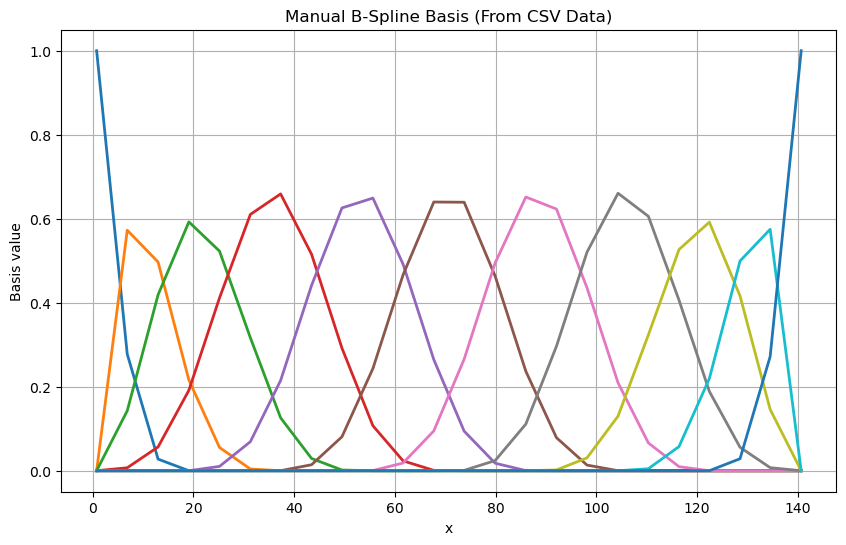

In [4]:
"""
===========================================================
Manual B-Spline Basis Generator (Using Uploaded Data)
===========================================================
Author: Patrick Baghdasarian
Description:
    - Loads yield-strip dataset from uploaded CSV
    - Extracts x-variable (Position or whichever you choose)
    - Builds manual B-spline basis (open-uniform knots)
    - Returns basis matrix X and knots
===========================================================
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline


# ============================================================
# 1. Load Your Data
# ============================================================
def load_data(filepath="/mnt/data/Example1SmoothHarvestStrip214.csv"):
    print("\nLoading:", filepath)
    df = pd.read_csv(filepath)

    print("\nColumns found:", list(df.columns))
    print(df.head())

    return df


# ============================================================
# 2. Manual Knot Builder
# ============================================================
def build_manual_knots(x, n_knots=10, degree=3):
    x = np.asarray(x)
    xmin, xmax = x.min(), x.max()

    # Number of internal knots
    n_internal = n_knots - degree + 2
    internal = np.linspace(xmin, xmax, n_internal)

    # Open-uniform: repeat boundaries degree times
    knots = np.concatenate(([xmin]*degree, internal, [xmax]*degree))

    return knots


# ============================================================
# 3. Manual Basis Construction
# ============================================================
def manual_bspline_basis(x, n_knots=10, degree=3):
    x = np.asarray(x)
    knots = build_manual_knots(x, n_knots=n_knots, degree=degree)

    n_basis = len(knots) - degree - 1
    X = np.zeros((len(x), n_basis))

    for j in range(n_basis):
        c = np.zeros(n_basis)
        c[j] = 1.0
        spline_j = BSpline(knots, c, degree, extrapolate=False)
        X[:, j] = spline_j(x)

    return X, knots


# ============================================================
# 4. Optional: Plot the Basis
# ============================================================
def plot_manual_basis(x, X):
    plt.figure(figsize=(10, 6))
    for j in range(X.shape[1]):
        plt.plot(x, X[:, j], lw=2)
    plt.title("Manual B-Spline Basis (From CSV Data)")
    plt.xlabel("x")
    plt.ylabel("Basis value")
    plt.grid(True)
    plt.show()


# ============================================================
# 5. Main Execution
# ============================================================
if __name__ == "__main__":
    # Load the uploaded CSV file
    df = load_data("Example1SmoothHarvestStrip214.csv")

    # Choose the variable to spline
    # Change this if needed (Yield, Distance, etc.)
    x = df["Northing"].values

    # Build manual basis
    X, knots = manual_bspline_basis(x, n_knots=10, degree=3)

    print("\nBasis shape:", X.shape)
    print("Knots:", knots)

    # Plot
    plot_manual_basis(x, X)


Manual Basis Matrix Shape: (24, 11)
Knot Vector: [  0.78307296   0.78307296   0.78307296   0.78307296  18.27033113
  35.75758931  53.24484749  70.73210566  88.21936384 105.70662201
 123.19388019 140.68113836 140.68113836 140.68113836 140.68113836]


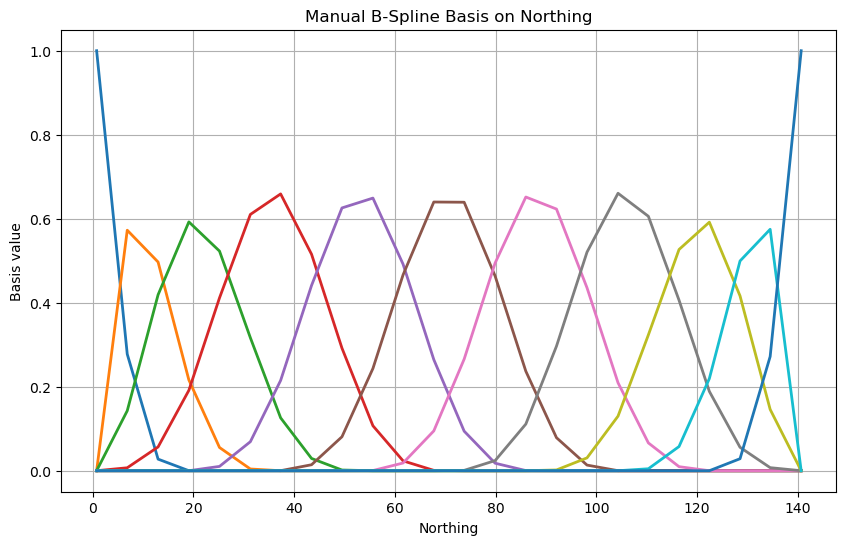

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# ------------------------------------------------------------
# Load your data
# ------------------------------------------------------------
df = pd.read_csv("Example1SmoothHarvestStrip214.csv")

# Extract the variable for the spline
x = df["Northing"].values.astype(float)

# ------------------------------------------------------------
# Manual knot construction (open-uniform B-spline)
# ------------------------------------------------------------
degree = 3                # cubic spline
n_knots = 10              # total knot count

xmin = x.min()
xmax = x.max()

n_internal = n_knots - degree + 2
internal_knots = np.linspace(xmin, xmax, n_internal)

# Open-uniform knots: repeat boundaries degree times
knots = np.concatenate((
    [xmin] * degree,
    internal_knots,
    [xmax] * degree
))

# ------------------------------------------------------------
# Number of basis functions
# ------------------------------------------------------------
n_basis = len(knots) - degree - 1

# Allocate matrix
X = np.zeros((len(x), n_basis))

# ------------------------------------------------------------
# Build each basis function manually
# ------------------------------------------------------------
for j in range(n_basis):
    # coefficient vector selecting basis j
    c = np.zeros(n_basis)
    c[j] = 1.0

    # construct B-spline basis function j
    spline_j = BSpline(knots, c, degree, extrapolate=False)

    # evaluate on all x
    X[:, j] = spline_j(x)

# ------------------------------------------------------------
# Output results
# ------------------------------------------------------------
print("Manual Basis Matrix Shape:", X.shape)
print("Knot Vector:", knots)

# ------------------------------------------------------------
# Plot basis
# ------------------------------------------------------------
plt.figure(figsize=(10, 6))
for j in range(n_basis):
    plt.plot(x, X[:, j], linewidth=2)
plt.title("Manual B-Spline Basis on Northing")
plt.xlabel("Northing")
plt.ylabel("Basis value")
plt.grid(True)
plt.show()
